In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.read_excel('tg.xlsx')
df = pd.read_excel('tg.xlsx')
df.head()

,PC (mmH2O),DV (t/h),VR (tr/min),TV (°C),PE (MW)
0,712.995789,231.413406,3002.122314,452.617828,55.856407
1,713.796997,230.703949,3001.251221,452.889404,54.910316
2,711.194092,230.742188,3001.751465,452.796936,55.240372
3,710.792725,230.413254,3000.750000,452.700378,54.275158
4,715.920410,230.749146,3001.125244,452.089355,53.776802


In [3]:
df.shape

(63, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC (mmH2O)   63 non-null     float64
 1   DV (t/h)     63 non-null     float64
 2   VR (tr/min)  63 non-null     float64
 3   TV (°C)      63 non-null     float64
 4   PE (MW)      63 non-null     float64
dtypes: float64(5)
memory usage: 2.6 KB


In [244]:
df.dtypes

PC (mmH2O)     float64
DV (t/h)       float64
VR (tr/min)    float64
TV (°C)        float64
PE (MW)        float64
dtype: object

In [5]:
df.columns

Index(['PC (mmH2O)', 'DV (t/h)', 'VR (tr/min)', 'TV (°C)', 'PE (MW)'], dtype='object')

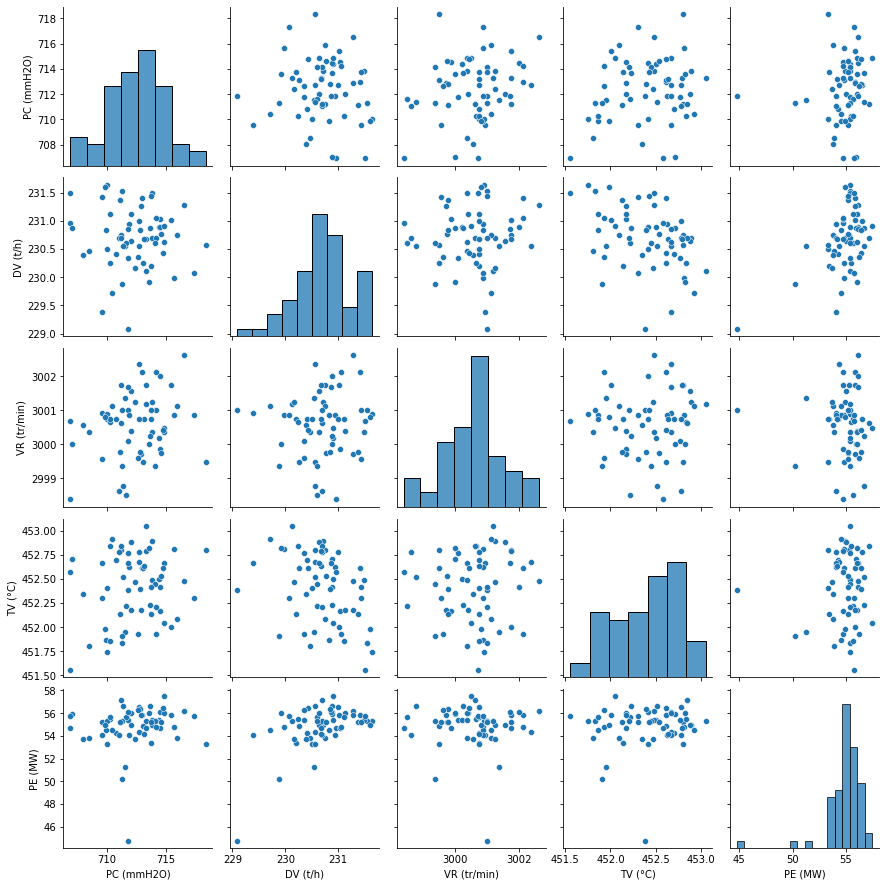

In [6]:
sns.pairplot(df)

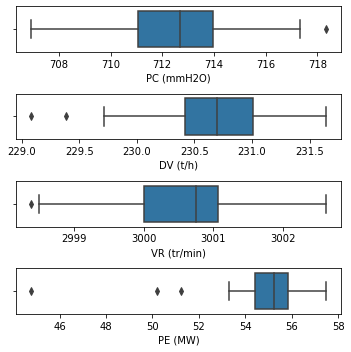

In [7]:
#  Vérification des valeurs aberrantes

fig, axs = plt.subplots(4, figsize = (5,5))

plt3 = sns.boxplot(df['PC (mmH2O)'], ax = axs[0])
plt3 = sns.boxplot(df['DV (t/h)'], ax = axs[1])
plt3 = sns.boxplot(df['VR (tr/min)'], ax = axs[2])
plt3 = sns.boxplot(df['PE (MW)'], ax = axs[3])

plt.tight_layout()

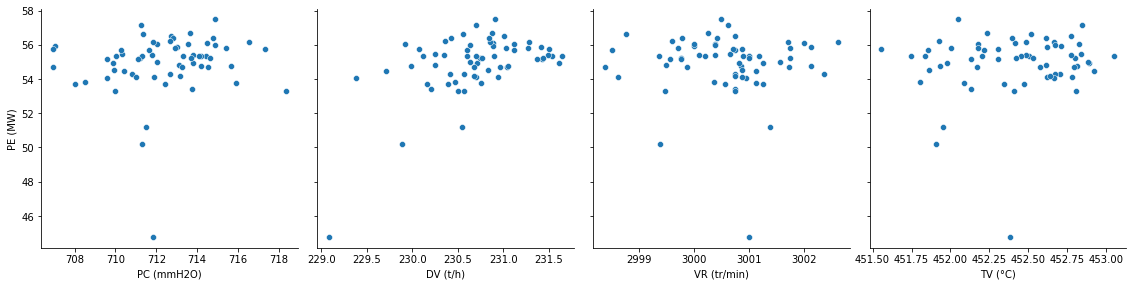

In [9]:
sns.pairplot(df, x_vars=['PC (mmH2O)', 'DV (t/h)', 'VR (tr/min)', 'TV (°C)'], 
             y_vars='PE (MW)', height=4, aspect=1, kind='scatter')
plt.show()

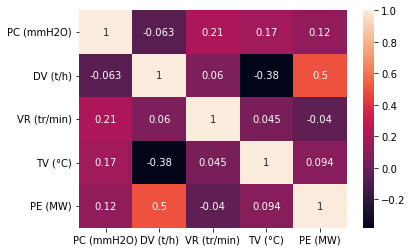

In [11]:
sns.heatmap(df.corr(), annot = True)
plt.show()

# StandardScaler

In [289]:
from sklearn.preprocessing import StandardScaler

In [290]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

In [309]:
df_sc.head()

,PC (mmH2O),DV (t/h),VR (tr/min),TV (°C),PE (MW)
0,0.257772,1.370583,1.675156,0.585190,0.533706
1,0.593841,0.003898,0.722127,1.354103,0.000882
2,-0.497953,0.077560,1.269424,1.092297,0.186764
3,-0.666307,-0.556092,0.173762,0.818914,-0.356830
4,1.484510,0.090963,0.584301,-0.911073,-0.637497


# Defining the variables and splitting the data

In [12]:
X = df.drop(['PE (MW)'], axis=1).values
y = df['PE (MW)'].values

#.reshape(-1,1)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [14]:
# Création de la matrice X, inclut le Biais

X = np.hstack((X, np.ones((X.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

print(X.shape)
print(X[:10])

(63, 5)
[[7.12995789e+02 2.31413406e+02 3.00212231e+03 4.52617828e+02
  1.00000000e+00]
 [7.13796997e+02 2.30703949e+02 3.00125122e+03 4.52889404e+02
  1.00000000e+00]
 [7.11194092e+02 2.30742188e+02 3.00175146e+03 4.52796936e+02
  1.00000000e+00]
 [7.10792725e+02 2.30413254e+02 3.00075000e+03 4.52700378e+02
  1.00000000e+00]
 [7.15920410e+02 2.30749146e+02 3.00112524e+03 4.52089355e+02
  1.00000000e+00]
 [7.13749634e+02 2.30199173e+02 3.00075000e+03 4.52134583e+02
  1.00000000e+00]
 [7.11518738e+02 2.30547760e+02 3.00137500e+03 4.51953369e+02
  1.00000000e+00]
 [7.08505676e+02 2.30472000e+02 3.00035938e+03 4.51801941e+02
  1.00000000e+00]
 [7.10001831e+02 2.30502747e+02 3.00075000e+03 4.52410522e+02
  1.00000000e+00]
 [7.11026428e+02 2.30696503e+02 2.99862598e+03 4.52777466e+02
  1.00000000e+00]]


In [15]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [16]:
reg.fit(X, y)
reg.coef_

array([ 0.09978671,  2.1822301 , -0.23403418,  1.60145328,  0.        ])

In [17]:
reg.intercept_

-541.8965353984769

In [18]:
# Initialisation du vecteur theta aléatoire, avec 5 éléments (car X a cinq colonnes)

theta = np.random.randn(5, 1)
theta

array([[-0.04907562],
       [ 2.01228702],
       [-0.49873642],
       [ 0.6081018 ],
       [ 0.03180917]])

# 2 Modèle Linéaire


In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [36]:
def model(X, theta):
    return X.dot(theta)

In [37]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

NameError: name 'x' is not defined

In [39]:
model.fit(X,y)
model.score(X,y)

0.37102388588987645

In [40]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

NameError: name 'x' is not defined

# 2.3 Fonction Cout

In [24]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [25]:
cost_function(X, y, theta)

22598042.155049473

# 2.4 Gradient Descent

In [26]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [27]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

# 2.5 Phase d'entrainement

In [28]:
n_iterations = 40
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [29]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

array([[-2.42628991e+198, -2.42358277e+198, -2.42452719e+198,
        -2.42176533e+198, -2.42033934e+198, -2.41923774e+198,
        -2.41302886e+198, -2.42052911e+198, -2.41899996e+198,
        -2.42124553e+198, -2.42511808e+198, -2.42480381e+198,
        -2.42323950e+198, -2.42377214e+198, -2.42501983e+198,
        -2.42995977e+198, -2.42187840e+198, -2.42239680e+198,
        -2.42008462e+198, -2.42107485e+198, -2.39457930e+198,
        -2.41007801e+198, -2.42240774e+198, -2.42336490e+198,
        -2.42023101e+198, -2.42123870e+198, -2.42306715e+198,
        -2.42148477e+198, -2.41900249e+198, -2.42304624e+198,
        -2.42438047e+198, -2.42487659e+198, -2.42293361e+198,
        -2.42584505e+198, -2.42681721e+198, -2.42696129e+198,
        -2.42311698e+198, -2.42483165e+198, -2.43093797e+198,
        -2.42482091e+198, -2.42483877e+198, -2.42652331e+198,
        -2.42492104e+198, -2.42824186e+198, -2.42676492e+198,
        -2.42711418e+198, -2.42856470e+198, -2.42622318e+198,
        

# 2.6 Courbe d'apprentissage

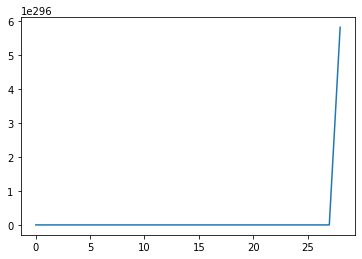

In [30]:
plt.plot(range(n_iterations), cost_history)

# 1.7 Evaluation finale

In [311]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [313]:
coef_determination(y, predictions)

Puissance électrique (MW) production   -inf
dtype: float64

# 1. Train Test Split

In [213]:
from sklearn.model_selection import train_test_split

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)
# randome_state: Controler l'aléatoire en fixant sur un nbre exple:5
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (50, 5)
Test set: (13, 5)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not     Puissance électrique (MW) production
43                             55.378014
61                             54.917915
60                             56.242470
52                             55.692791
18                             54.495842
24                             54.834175
7                              51.221939
25                             53.738945
3                              55.240372
20                             54.033848
63                             55.218643
30                             54.722809
32                             55.362480
5                              53.776802
33                             54.683449
1                              55.856407
27                             54.730118
6                              53.391815
62                             55.187649
45                             56.022411
59                             55.769508
41                             55.349262
57                             55.343319
19                             53.687782
23                             54.499668
21                             44.774193
51                             55.834759
2                              54.910316
12                             55.337044
14                             54.976498
53                             55.737095
50                             55.236576
54                             56.139698
16                             57.138947
13                             54.790348
8                              53.843124
58                             56.417530
31                             55.189095
49                             56.666069
28                             54.177109
40                             55.343021
37                             54.747532
9                              53.308716
10                             54.093498
17                             54.314674
55                             56.376545
39                             57.480808
48                             55.833084
15                             55.412540
36                             56.091038

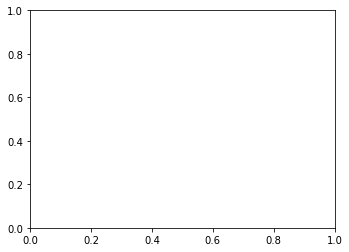

In [292]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train, X_train, c=y_train, alpha=0.8) 
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test, X_test, c=y_test, alpha=0.8)
plt.title('Test set')

In [218]:
from sklearn.neighbors import KNeighborsClassifier

In [219]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)
print('Train score:',  model.score(X_train, y_train))
print('Test score:',  model.score(X_test, y_test))

/Users/abdellam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: Unknown label type: 'continuous'

# 2. Validation Set et Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score 

In [291]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

NameError: name 'cross_val_score' is not defined

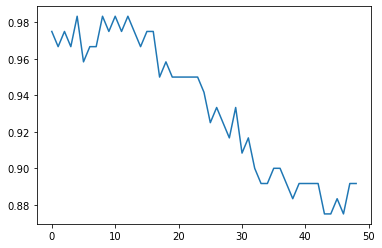

In [20]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

In [17]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9833333333333334

# 3. Validation Curve

In [25]:
from sklearn.model_selection import validation_curve

/Users/abdellam/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


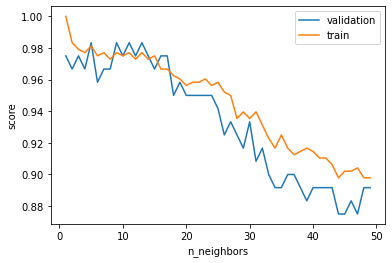

In [26]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train,
                                          'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

# 4. GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [31]:
print(grid.best_score_)
print(grid.best_params_)

0.9833333333333334
{'metric': 'euclidean', 'n_neighbors': 5}


In [33]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

# 5. Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

# 6. Learning Curve

In [39]:
from sklearn.model_selection import learning_curve